In [1]:
import gym
from gym import wrappers
# run that setup file to avoid errors

import gym_gazebo
import time
import numpy
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import rospy
#import tf
import numpy as np
import random
from collections import namedtuple, deque
from queue import PriorityQueue

# from model import QNetwork
# from model import QNetworkCNN
from torch.autograd import Variable

import torch
import torch.nn.functional as F
import torch.optim as optim

In [3]:

import torch
from torch import nn
from collections import deque
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
import gym

cuda:0


In [7]:
env = gym.make('CartPole-v0')

In [11]:
print(env.observation_space,env.action_space)
env.close()

Box(4,) Discrete(2)


In [4]:
env = gym.make('GazeboBATBot_Sonar-v1')

Gazebo launched!
Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.


In [5]:
# checking the working of 1D conv 
a = torch.randn(1, 100, 1)  

print(a.size())
m = nn.Conv1d(100, 100, kernel_size = 8 , stride = 1 , padding = 5 ) 
out = m(a)
print("out size",out.size())
print("covolutional layer",m)



torch.Size([1, 100, 1])
out size torch.Size([1, 100, 4])
covolutional layer Conv1d(100, 100, kernel_size=(8,), stride=(1,), padding=(5,))


debug 3
plotting echoes...


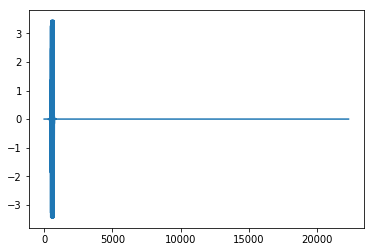

0.002434856050154742 0.002435384427799898 min delays
sample delays [0.00454697 0.00443787 0.00433788 ... 0.00283195 0.00284338 0.00285762] [0.00306886 0.00299948 0.00293589 ... 0.00283195 0.00284338 0.00285762]
echo energy before 0.007711892885426717 0.0031699544446877437
windows (array([  43,   44,   45, ..., 5975, 5976, 5977]),) (array([  37,   38,   39, ..., 5406, 5407, 5408]),) (2131,) (1926,)
echoes [0.00028822 0.00046009 0.00047136 ... 0.00026478 0.00027186 0.00027372] [0.00046951 0.00093641 0.00209799 ... 0.00031988 0.0003186  0.00030951] (2131,)
echoes zeroes [] []
plotting echoes...
l e -2.791168929200445  R E 0.1354909299369518 energies 827.3156362378231 1410.8792160707753


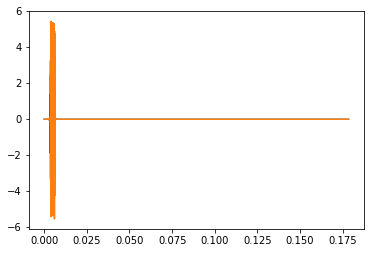

debug 2
debug
the observation size 2 the reduced observation (-2.791168929200445, 0.1354909299369518)


In [12]:
action = 2
observation, reward, done, info = env.step(action, debug = True)
print("the observation size", len(observation), "the reduced observation", observation)


In [8]:

# env._close()

In [10]:
import sys
def print_slow(str , delay = 0.01):
    for letter in str:
        sys.stdout.write(letter)
        sys.stdout.flush()
        time.sleep(delay)

In [11]:
print_slow("aye aye aye enga paru")

aye aye aye enga paru

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:

state_Type = type(observation)
print("the state_type of the observation", state_Type , observation)

the state_type of the observation <class 'tuple'> (-27.85030338120151, -58.2684477620961)


In [14]:
class QNetworkCNN_1D_BATBOT(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=64, fc2_units=64 , dropout = 0.1 , augment_frames = 3 ):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(QNetworkCNN_1D_BATBOT, self).__init__()
        self.seed = torch.manual_seed(seed = seed)
        self.conv1_left = nn.Conv1d(augment_frames, 128, kernel_size = 128 , stride=5, padding=1)
        self.conv1bnorm_left = nn.BatchNorm1d(128)
        self.conv2_left = nn.Conv1d(128, 64, kernel_size = 16, stride=2, padding=1)
        self.conv2bnorm_left = nn.BatchNorm1d(64)
        self.conv3_left = nn.Conv1d(64, 64, kernel_size = 5, stride=1, padding=1)
        self.conv3bnorm_left = nn.BatchNorm1d(64)
        self.dropout_left = nn.Dropout(dropout)
        self.pool_left = nn.MaxPool1d(kernel_size = 4, stride = 4 )
        
        self.conv1_right = nn.Conv1d(augment_frames, 128, kernel_size= 128, stride=5, padding=1)
        self.conv1bnorm_right = nn.BatchNorm1d(128)
        self.conv2_right = nn.Conv1d(128, 64, kernel_size = 16, stride=2, padding=1)
        self.conv2bnorm_right = nn.BatchNorm1d(64)
        self.conv3_right = nn.Conv1d(64, 64, kernel_size = 5, stride=1, padding=1)
        self.conv3bnorm_right = nn.BatchNorm1d(64)
        self.dropout_right = nn.Dropout(dropout)
        self.pool_right = nn.MaxPool1d(kernel_size = 4, stride = 4 )
        
        # this needs to be changed accordingly
        self.in_linear = 6*64
        
        self.fc1 = nn.Linear(2*self.in_linear, fc1_units)
        self.fc1bnorm = nn.BatchNorm1d(fc1_units)
        self.fc2 = nn.Linear(fc1_units,  fc2_units)
        self.fc2bnorm = nn.BatchNorm1d(fc2_units)
        self.fc2d = nn.Linear(fc2_units,  fc2_units)
        self.fc2dbnorm = nn.BatchNorm1d(fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.dropout = nn.Dropout(dropout) 

    def forward(self, left_state, right_state):
        """Build a network that maps state -> action values."""
        x1 = self.conv1_left(left_state)
        x1 = self.conv1bnorm_left(x1)
        x1 = F.relu(x1)
        x1 = self.pool_left(x1)
        x1 = self.conv2_left(x1)
        x1 = self.conv2bnorm_left(x1)
        x1 = F.relu(x1)
        x1 = self.pool_left(x1)
        x1 = self.conv3_left(x1)
        x1 = self.conv3bnorm_left(x1)
        x1 = F.relu(x1)
        x1 = self.pool_left(x1)
        
        x2 = self.conv1_right(right_state)
        x2 = self.conv1bnorm_right(x2)
        x2 = F.relu(x2)
        x2 = self.pool_right(x2)
        x2 = self.conv2_right(x2)
        x2 = self.conv2bnorm_right(x2)
        x2 = F.relu(x2)
        x2 = self.pool_right(x2)
        x2 = self.conv3_right(x2)
        x2 = self.conv3bnorm_right(x2)
        x2 = F.relu(x2)
        x2 = self.pool_right(x2)
        
        
        
        #print(x.size())
        x1 = x1.view(-1,self.in_linear)
        x2 = x2.view(-1,self.in_linear)
        x = torch.cat((x1,x2)).view(-1, 2*self.in_linear)
        #print(x.size())
        x = self.fc1(x)
        x = self.fc1bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.fc2bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.fc2d(x)
        x = self.fc2dbnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        return self.fc3(x)

In [15]:
# this uses the lower diemensional data 
# energies of the echo from the left and right hear 
class QNetworkANN_BATBOT(nn.Module):
    def __init__(self, state_size , action_size , seed, fc1_units=64, fc2_units=64 ,fc3_units = 64, dropout = 0.3, augment_frames = 3):
        super(QNetworkANN_BATBOT, self).__init__()
        self.in_linear = 2*augment_frames
        # LAYER 1 - input layer
        self.fc1 = nn.Linear(self.in_linear , fc1_units)
        self.fc1bnorm = nn.BatchNorm1d(fc1_units)
        # HIDDEN LAYER 1
        self.fc2 = nn.Linear(fc1_units,fc2_units)
        self.fc2bnorm = nn.BatchNorm1d(fc2_units)
        # HIDDEN LAYER 2
        self.fc3 = nn.Linear(fc2_units,fc3_units)
        self.fc3bnorm = nn.BatchNorm1d(fc3_units)
        # OUTPUT LAYER
        self.fc4 = nn.Linear(fc3_units, action_size)
        #DROPOUT
        self.dropout = nn.Dropout(dropout) 
    def forward(self, left_state , right_state):
        #joining the left ear and right ear
        x = torch.cat((left_state,right_state)).view(-1, self.in_linear)
        #INPUT BLOCK
        x = self.fc1(x)
        x = self.fc1bnorm(x)
        x = F.relu(x)
#         x = self.dropout(x)
        #LAYEr 1 BLOCK
        x = self.fc2(x)
        x = self.fc2bnorm(x)
        x = F.relu(x)
#         x = self.dropout(x)
        #LAYER 2 BLOCK
        x = self.fc3(x)
        x = self.fc3bnorm(x)
        x = F.relu(x)
#         x = self.dropout(x)
        # OUTPUT BLOCK
        return self.fc4(x)
    

In [16]:
# this uses the lower diemensional data 
# energies of the echo from the left and right hear 
class QNetworkANN(nn.Module):
    def __init__(self, state_size , action_size , seed, fc1_units=64, fc2_units=64 ,fc3_units = 64, dropout = 0.3, augment_frames = 3):
        super(QNetworkANN, self).__init__()
        self.in_linear = state_size*augment_frames
        # LAYER 1 - input layer
        self.fc1 = nn.Linear(self.in_linear , fc1_units)
        self.fc1bnorm = nn.BatchNorm1d(fc1_units)
        # HIDDEN LAYER 1
        self.fc2 = nn.Linear(fc1_units,fc2_units)
        self.fc2bnorm = nn.BatchNorm1d(fc2_units)
        # HIDDEN LAYER 2
        self.fc3 = nn.Linear(fc2_units,fc3_units)
        self.fc3bnorm = nn.BatchNorm1d(fc3_units)
        # OUTPUT LAYER
        self.fc4 = nn.Linear(fc3_units, action_size)
        #DROPOUT
        self.dropout = nn.Dropout(dropout) 
    def forward(self, state):
        #joining the left ear and right ear
        x = state.view(-1, self.in_linear)
        #INPUT BLOCK
        x = self.fc1(x)
        x = self.fc1bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        #LAYEr 1 BLOCK
        x = self.fc2(x)
        x = self.fc2bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        #LAYER 2 BLOCK
        x = self.fc3(x)
        x = self.fc3bnorm(x)
        x = F.relu(x)
        x = self.dropout(x)
        # OUTPUT BLOCK
        return self.fc4(x)

In [17]:
BUFFER_SIZE = int(7e5)  # replay buffer size
BATCH_SIZE = 32       # minibatch size
GAMMA = 0.99           # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 1e-4               # learning rate 

WeightDecay = 0

UPDATE_EVERY = 1      # how often to update the network
N_Update_per = 2 # no of updates per time

Momentum = 0.9  
Epislon = 0.99
min_Epislon = 0.001

Decay = 0.999
MaxBeta = 1
MinBeta = 0


ALPHA = 0.5
ALPHA2 = 1
ALPHA_min = 0.01
Alphadecay = 0.999 
ErrorOffset = 0.01
min_beta = 0.3

debug 3
plotting echoes...


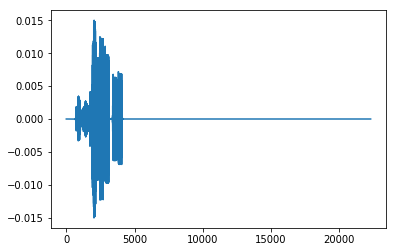

0.0053989764522103705 0.004108352871502147 min delays
sample delays [0.0300839  0.03012474 0.03019431 0.03029295 0.02705553 0.02253285
 0.01932133 0.01692508 0.01507032 0.01359351 0.012391   0.00983898
 0.0092225  0.00868646 0.00821666 0.00710554 0.00681104 0.00654593
 0.00554874 0.00539898 0.03008525 0.030126   0.03019548 0.03029403
 0.02707928 0.0225496  0.01933384 0.01693483 0.01507815 0.01359997
 0.01239642 0.00984251 0.00922562 0.00868925 0.00821917 0.00710744
 0.00681279 0.00654755 0.0055499  0.00540007 0.03008767 0.03012843
 0.03019791 0.03029647 0.02708351 0.02255269 0.01933623 0.01693675
 0.01507974 0.01360132 0.01239759 0.00984333 0.00922637 0.00868993
 0.0082198  0.00710795 0.00681327 0.00654801 0.00555026 0.00540042
 0.03009093 0.03013169 0.03020119 0.03029976 0.0270885  0.02255642
 0.01933916 0.01693914 0.01508175 0.01360305 0.0123991  0.0098459
 0.00922863 0.00869192 0.00822157 0.00710925 0.00681446 0.00654909
 0.005551   0.00540111 0.03009511 0.03013579 0.03020521 0.0303

l e -73.10510771306315  R E -14.863314111866623 energies 0.0008055335986482836 0.012161755647350935


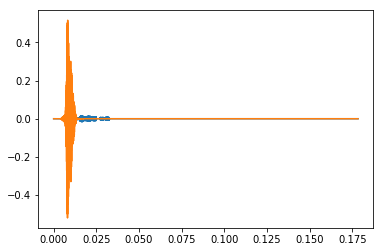

debug 2
debug
debug 3
plotting echoes...


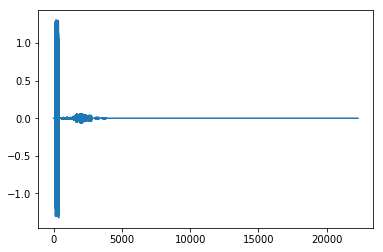

0.000588236004114151 0.000588236004114151 min delays
sample delays [0.00080783 0.00078944 0.00077154 ... 0.00450691 0.00451676 0.00452925] [0.00080783 0.00078944 0.00077154 0.00075413 0.00073723 0.00072084
 0.00070497 0.00066046 0.00064666 0.00063337 0.00062058 0.00060829
 0.00059649 0.00060748 0.00061631 0.00060698 0.00059848 0.00059077
 0.00059128 0.00059258 0.00060104 0.00061034 0.00060252 0.00059047
 0.0006023  0.00061464 0.00062748 0.00064083 0.00065471 0.0006691
 0.00068402 0.00069947 0.00071545 0.00073196 0.00074898 0.00076653
 0.00078458 0.00080313 0.00080314 0.00078459 0.00076654 0.000749
 0.00073197 0.00071546 0.00069948 0.00065472 0.00064084 0.00062749
 0.00061465 0.00060231 0.00059047 0.00060751 0.00060969 0.00060045
 0.00059205 0.00059259 0.00060105 0.00061034 0.00060253 0.00059047
 0.00060231 0.00061465 0.00062749 0.00064084 0.00065471 0.00066911
 0.00068403 0.00069948 0.00071546 0.00073197 0.00074899 0.00076654
 0.00078459 0.00080314 0.00080317 0.00078462 0.00076657 0.00

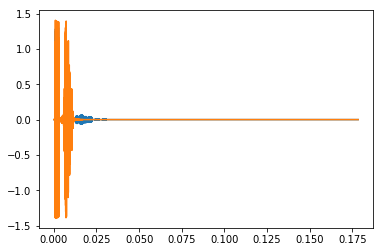

debug 2
debug
debug 3
plotting echoes...


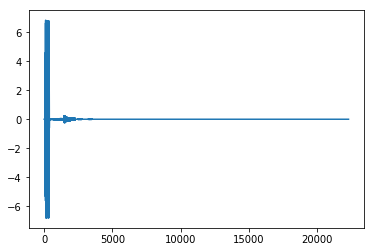

0.0005885663716232076 0.0005885663716232076 min delays
sample delays [0.00082167 0.00080376 0.0007863  ... 0.00280345 0.00282371 0.00284698] [0.00082167 0.00080376 0.0007863  0.00076931 0.0007528  0.00073676
 0.00072121 0.0006775  0.00066391 0.00065081 0.00063818 0.00062604
 0.00061436 0.00060315 0.00059239 0.00060757 0.00062957 0.00062004
 0.00061136 0.00060348 0.00059636 0.00058996 0.0005904  0.00059685
 0.00060402 0.00061196 0.0006207  0.0006303  0.00060245 0.00059722
 0.00060847 0.00062019 0.00063239 0.00064507 0.00065824 0.00067191
 0.00068607 0.00070073 0.00071589 0.00073155 0.00074771 0.00076435
 0.00078148 0.00079909 0.00081716 0.00081711 0.00079904 0.00078144
 0.00076431 0.00074766 0.00073151 0.00071585 0.00067187 0.00065821
 0.00064504 0.00063236 0.00062016 0.00060844 0.00059719 0.00060758
 0.00062958 0.00062004 0.00061136 0.00060349 0.00059637 0.00058997
 0.00059041 0.00059686 0.00060403 0.00061197 0.00062071 0.00063031
 0.00060246 0.00059723 0.00060848 0.0006202  0.0006324 

l e 28.352182345151764  R E 24.660993090993053 energies 6163.328138384091 719.108370378462


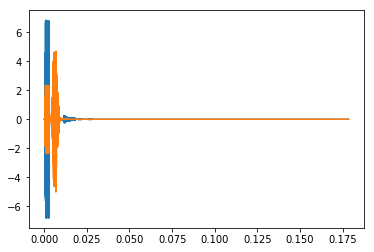

debug 2
debug
debug 3
plotting echoes...


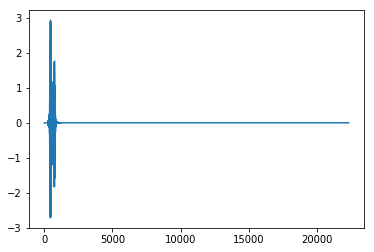

0.002001465769375072 0.002001465769375072 min delays
sample delays [0.00824604 0.00734627 0.0066292  ... 0.0029696  0.00304617 0.00312985] [0.00297658 0.0028804  0.00279281 ... 0.00283521 0.00289947 0.0029696 ]
echo energy before 0.3364490058659696 4592.815705264582
windows (array([  16,   17,   18, ..., 5818, 5819, 5820]),) (array([  11,   12,   13, ..., 5210, 5211, 5212]),) (4248,) (4179,)
echoes [0.06733472 0.01939964 0.00388321 ... 0.00025413 0.00024414 0.0002391 ] [0.00338625 0.01939964 0.07721665 ... 0.00029807 0.00030229 0.00028885] (4248,)
echoes zeroes [] []
plotting echoes...
l e 15.408471750809063  R E 39.60117873350966 energies 257.8102490706949 15238.053635726274


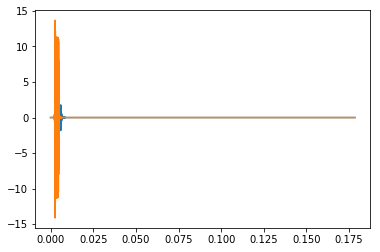

debug 2
debug
debug 3
plotting echoes...


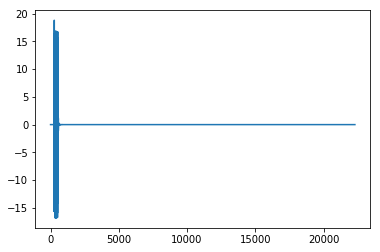

0.0017894348677466897 0.0017894348677466897 min delays
sample delays [0.00498926 0.00462142 0.0043079  ... 0.00306968 0.0031781  0.00329771] [0.00276043 0.00266538 0.00257901 ... 0.00228004 0.00265621 0.00272469]
echo energy before 12506.88248214524 6807.171165492739
windows (array([   9,   10,   11, ..., 5938, 5939, 5940]),) (array([   4,    5,    6, ..., 5563, 5564, 5565]),) (4632,) (5106,)
echoes [0.00157565 0.00359324 0.0076997  ... 0.000343   0.00021544 0.00027266] [0.00078098 0.00104496 0.00139168 ... 0.00057734 0.00062505 0.00052232] (4632,)
echoes zeroes [] []
plotting echoes...
l e 43.35212104809115  R E 45.40903344252678 energies 36329.78785703492 17573.642988153442


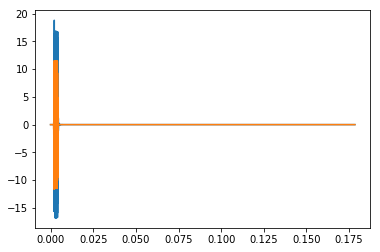

debug 2
debug
debug 3
plotting echoes...


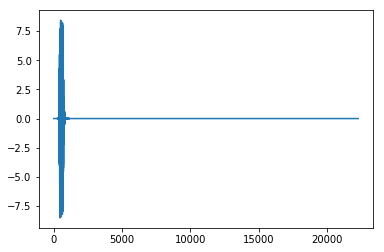

0.001963182757882511 0.001963182757882511 min delays
sample delays [0.00749166 0.00673209 0.00611762 ... 0.00296083 0.00304047 0.00312758] [0.00295474 0.00285721 0.00276844 ... 0.00282114 0.00288792 0.00296083]
echo energy before 0.1326285445609391 5619.415312232816
windows (array([  15,   16,   17, ..., 5886, 5887, 5888]),) (array([  10,   11,   12, ..., 5274, 5275, 5276]),) (4347,) (4267,)
echoes [0.17353777 0.07353034 0.02112212 ... 0.00025686 0.00024624 0.00024062] [0.00221071 0.00369783 0.02112212 ... 0.00030127 0.0003049  0.0002907 ] (4347,)
echoes zeroes [] []
plotting echoes...
l e 18.504033276549674  R E 40.24241995219734 energies 3643.188216481839 23113.336479595095


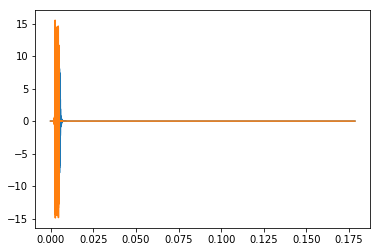

debug 2
debug
debug 3
plotting echoes...


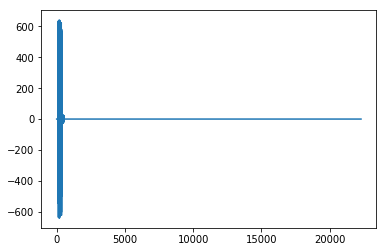

0.0005882620373192955 0.0005882620373192955 min delays
sample delays [0.0050433  0.00238373 0.00203025 ... 0.00070297 0.00072738 0.00075428] [0.00156945 0.00141123 0.00128309 ... 0.00070297 0.00072738 0.00075428]
echo energy before 20115793.011508685 1519.5203256206673
windows (array([   4,    5,    6, ..., 7217, 7218, 7219]),) (array([   5,    6,    7, ..., 7014, 7015, 7016]),) (5336,) (5524,)
echoes [0.00966304 0.00570996 0.00371612 ... 0.00479608 0.00463358 0.00437894] [0.00021633 0.0007716  0.0046589  ... 0.00579417 0.00543015 0.00495158] (5336,)
echoes zeroes [] []
plotting echoes...
l e 60.818677137218  R E 49.780465648739224 energies 52737842.67932223 616984.0582434256


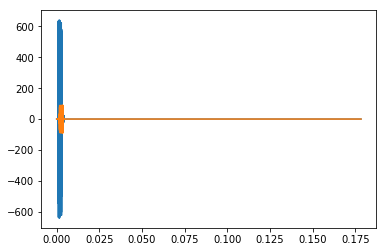

debug 2
debug
debug 3
plotting echoes...


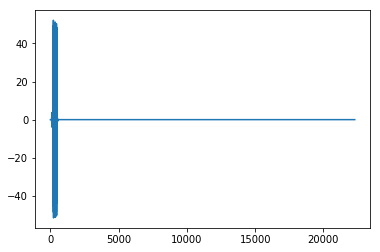

0.0005882847835035885 0.0005882847835035885 min delays
sample delays [0.00338446 0.00164377 0.00145916 ... 0.00093277 0.0009889  0.00105329] [0.00145916 0.00131295 0.0011944  ... 0.00093277 0.0009889  0.00105329]
echo energy before 1656.8983638204934 5346.321545978151
windows (array([   2,    3,    4, ..., 7793, 7794, 7795]),) (array([   0,    1,    2, ..., 7475, 7476, 7477]),) (5975,) (5990,)
echoes [0.00322072 0.00497547 0.004994   ... 0.00269187 0.00247324 0.00221127] [0.00064061 0.00155895 0.0031696  ... 0.00325205 0.00289841 0.00250044] (5975,)
echoes zeroes [] []
plotting echoes...
l e 48.28818096384624  R E 51.50322834386362 energies 215019.5807536373 75223.94147384258


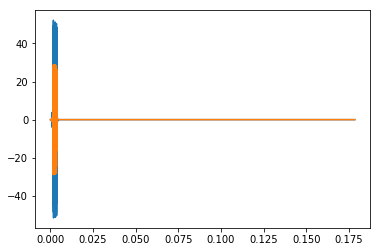

debug 2
debug
debug 3
plotting echoes...


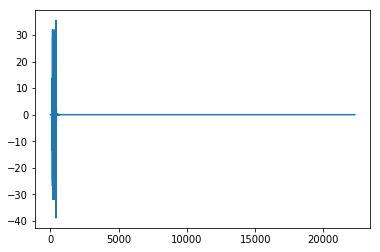

0.0005882838193108054 0.0005882838193108054 min delays
sample delays [0.00545157 0.00415746 0.00336246 ... 0.00082684 0.000848   0.00087111] [0.00158517 0.00146063 0.00135542 ... 0.00082684 0.000848   0.00087111]
echo energy before 27618.80534196885 132529.76670174542
windows (array([   8,    9,   10, ..., 6831, 6832, 6833]),) (array([   4,    5,    6, ..., 6519, 6520, 6521]),) (6045,) (6130,)
echoes [0.04284913 0.01935239 0.0079578  ... 0.00344456 0.00338798 0.0032634 ] [0.00143038 0.00061499 0.0015211  ... 0.00416139 0.00397042 0.00369017] (6045,)
echoes zeroes [] []
plotting echoes...
l e 57.836051984739825  R E 63.51417910775577 energies 113061.46022144116 358336.0310778578


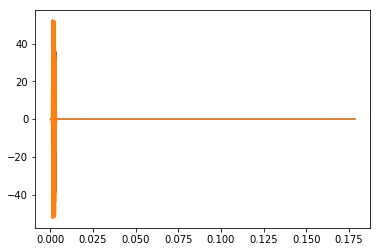

debug 2
debug
Score: 0.38999999999999996


In [18]:
action_size = 3
score = 0 # initialize the score
i = 30
while i > 0:
    action = np.random.randint(action_size)                 # select an action
    observation, reward, done, info = env.step(action , debug= True)      # send the action to the environment
    next_state = observation                                # see if episode has finished
    
    
    score += reward                                         # update the score
    state = next_state                                      # roll over the state to next time step
    i-=1
    if done:                                                # exit loop if episode finished
        break
    
print("Score: {}".format(score))

In [19]:
def data_norm(obs, min_val = -76, max_val=60):
    return (np.array(obs) - min_val)/(max_val - min_val)

normd = data_norm(observation)
print(normd , observation)

[0.98408862 1.02583955] (57.836051984739825, 63.51417910775577)


In [20]:
print("\U0001F605")

😅


In [21]:
import numpy as np
import random
from collections import namedtuple, deque
from queue import PriorityQueue

# from model import QNetwork
# from model import QNetworkCNN
from torch.autograd import Variable

import torch
import torch.nn.functional as F
import torch.optim as optim

In [22]:
print(observation)

(57.836051984739825, 63.51417910775577)


In [23]:
print(type(observation))
state_Type = type(observation)
test_agent= Agent(len(observation), 3 , state_Type , seed = 0 , signal = "eng")
test_agent.memory.batch_size = 32
for i in range(800):
    test_agent.step([i,observation[1]], 2, 1, [i+1,observation[1]], False)
print("test_memory added to the replay buffer" , len(test_agent.memory.memory), "batch size", test_agent.memory.batch_size)
print(test_agent.memory.memory[0])
test_sample = test_agent.memory.sample_idx_withBatch(10)
print("sample",test_sample, "states", test_sample[0].size())
states = test_sample[0]
left_s = states[:,:,0].view(10 ,  -1)
right_s = states[:,:,1].view(10 ,  -1)
print(left_s.size(), left_s , right_s)
# print("the sampled memory for learning", np.shape(test_agent.memory.sample_idx()[0]), test_agent.memory.sample_idx()[1][2])

<class 'tuple'>


NameError: name 'Agent' is not defined

In [24]:
print(states, states.size(), states.view(10,-1).size())
test_agent.act([32,31], eps =0, debug = True)

NameError: name 'states' is not defined

In [25]:
a  = test_agent.memory.sample_idx(peek_a_boo= True)
print(a[0][:,0,0].shape)
plt.plot(a[0][0,2,1].cpu().numpy())

NameError: name 'test_agent' is not defined

In [26]:

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples. 
    Also can be used to store the priortized tuples"""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            Priority(float):
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        self.selectedIdx = np.array([])
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)
        #print(experiences[0])
        states = torch.from_numpy(np.stack([e.state for e in experiences if e is not None] , axis =0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.stack([e.next_state for e in experiences if e is not None], axis =0)).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)
    def sample_idx(self , peek_a_boo = False):
        if peek_a_boo == True:
            batch_size = 1
        else:
            batch_size = self.batch_size
        index_value = random.sample(list(enumerate(self.memory)), k= batch_size)
        #print("batch", self.batch_size)
        states = torch.from_numpy(np.stack([[self.memory[e[0]-2].state,self.memory[e[0]-1].state ,e[1].state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1] , axis = 0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e[1].action for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e[1].reward for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1])).float().to(device)
        next_states = torch.from_numpy(np.stack([[self.memory[e[0]-2].next_state, self.memory[e[0]-1].next_state ,e[1].next_state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1] , axis = 0 )).float().to(device)
        dones = torch.from_numpy(np.vstack([e[1].done for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(self.memory)-1]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    def sample_idx_withBatch(self , batch_size , peek_a_boo = False):
        
        if peek_a_boo == True:
            batch_size = 1
        index_value = random.sample(list(enumerate(self.memory)), k=batch_size)
        states = torch.from_numpy(np.stack([[self.memory[e[0]-2].state,self.memory[e[0]-1].state ,e[1].state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True] , axis = 0 )).float().to(device)
        actions = torch.from_numpy(np.vstack([e[1].action for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e[1].reward for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True])).float().to(device)
        next_states = torch.from_numpy(np.stack([[self.memory[e[0]-2].next_state,self.memory[e[0]-1].next_state ,e[1].next_state] for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True] , axis = 0 )).float().to(device)
        dones = torch.from_numpy(np.vstack([e[1].done for e in index_value if e is not None and e[1].done != True and self.memory[e[0]-1].done != True]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    
    
        



    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)
    
class PriorityReplayBuffer:
    """Fixed-size buffer to store experience tuples. 
    Also can be used to store the priortized tuples"""

    def __init__(self, action_size, buffer_size, batch_size, alpha, state_type ,  seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            Priority(float):
            seed (int): random seed
        """
        self.action_size = action_size
        self.Prioritymemory = deque(maxlen=buffer_size) 
        self.batch_size = batch_size
        self.expType = [('state',state_type), ('action','float'),('reward','float'), ('next_state',state_type),('done','bool'),('Priority','float')]
        self.experienceMemory = np.array([], dtype = self.expType)
        self.seed = random.seed(seed)
        self.max_size = buffer_size
        self.alpha = alpha
        
    
    def add(self, state, action, reward, next_state, done, Priority):
        """Add a new experience to memory."""
        if(np.size(self.experienceMemory) > self.max_size):
            self.experienceMemory = np.delete(self.experienceMemory , 0 )
        e = (state, action, reward, next_state, done, Priority)
        exp = np.array([e] , dtype = self.expType)
        self.experienceMemory = np.append(self.experienceMemory , exp )
        #print("memory", np.shape(self.experienceMemory['state'][0]))
        #self.memory.append(e)
    
    def sample(self , alpha , beta):
        """ sample a batch of experiences from memory. based on the Priority"""
        # write ur own implementation
        self.alpha = alpha
        self.beta = beta
        if(self.beta < min_beta):
            self.beta = min_beta
        probs ,Choosenindex = self.Batchsample()
        self.selectedIdx = Choosenindex
        weights = (np.size(self.experienceMemory)* probs)**(-(self.beta))
        weights /= np.max(weights)
        weights = Variable(torch.from_numpy(np.vstack(weights)).float().to(device))
        states = Variable(torch.from_numpy(np.stack(self.experienceMemory['state'][Choosenindex] , axis =0)).float().to(device))
        #print("at sampling",states.size())
        actions = Variable(torch.from_numpy(np.vstack(self.experienceMemory['action'][Choosenindex])).long().to(device))
        rewards = Variable(torch.from_numpy(np.vstack(self.experienceMemory['reward'][Choosenindex])).float().to(device))
        next_states = Variable(torch.from_numpy(np.stack(self.experienceMemory['next_state'][Choosenindex] , axis =0)).float().to(device))
        dones = Variable(torch.from_numpy(np.vstack(self.experienceMemory['done'][Choosenindex]).astype(np.uint8)).float().to(device))
        
        
  
        return (states, actions, rewards, next_states, dones , weights)
    
    def Batchsample(self):
        """Samples the batch here """
        all_priorities = self.experienceMemory['Priority']
        probs = self.GetProbs(all_priorities)
        indeArr = np.arange(len(probs))
        Choosenindex = np.random.choice(indeArr, self.batch_size,p=probs, replace = False)
        return probs[Choosenindex] , Choosenindex
    
    def GetProbs(self, Pri):
        """ Probabilities are defiend here"""
        Numerator = np.power(Pri, self.alpha)
        Demoninator = np.sum(Numerator)
        Probs = Numerator / Demoninator
        return Probs
    
    def updatePriorities(self,Error):
        #print(self.selectedIdx , Error , np.size(Error) , np.size(self.selectedIdx))
        self.experienceMemory['Priority'][self.selectedIdx] = Error.flatten()
                                    
    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.experienceMemory)

def handling_echo_bug(echo , size = 5000):
    state = np.zeros(5000)
    state[:len(echo)] = echo
    return state

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# in case of cuda errors
# device =  "cpu"
print("Device which is used is " , device)

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, state_type,seed,signal = "echo", augment_states_T=3 ):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
            Beta is for sacling down the weights update due to the Priority Queues
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.Beta = 1
        self.Gamma = GAMMA
        self.augment_time =  augment_states_T

        # Q-Network
        if(signal == "echo"):
            self.qnetwork_local = QNetworkCNN_1D_BATBOT(state_size, action_size, seed , augment_frames =  augment_states_T).to(device)
            self.qnetwork_target = QNetworkCNN_1D_BATBOT(state_size, action_size, seed , augment_frames =  augment_states_T).to(device)
        else:
            print_slow("AI: ", delay =0)
            print_slow("Wtf! r u doing \U0001F620 I am dying here... \n")
            print_slow("ME: ", delay =0)
            print_slow("Sorry \U0001F605 zoned out little .. was watching some lame anime.. \U0001F62C \n")
            print_slow("AI: ", delay =0)
            print_slow("Adai Venna !!!.... mudidu vellaiya paru... \n")
            print_slow("ME: ", delay =0)
            print_slow("Seringa.. \U0001F62C \n")
            time.sleep(1)
            self.qnetwork_local = QNetworkANN_BATBOT(state_size, action_size, seed , augment_frames =  augment_states_T).to(device)
            self.qnetwork_target = QNetworkANN_BATBOT(state_size, action_size, seed , augment_frames =  augment_states_T).to(device)
            
            
        print("the model is defined successfully", self.qnetwork_target)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR , weight_decay= WeightDecay)
        self.state_type = state_type
        # Replay memory
        #self.memory = PriorityReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE,ALPHA,state_type, seed)
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
        
    
    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        #Priority = self.getError(state, action, reward, next_state,done)
        #self.memory.add(state, action, reward, next_state, done,Priority)
        #self, state, action, reward, next_state, done
        self.memory.add(state, action, reward, next_state,done)
        global Epislon
        Epislon *= Decay
        if(Epislon < min_Epislon):
            Epislon = min_Epislon
        beta = 1 - Epislon
        #print(beta)
        # alpha value for priority buffer
        global ALPHA2
        ALPHA2 *= Alphadecay
        if(ALPHA2 < ALPHA_min):
            ALPHA2 = ALPHA_min
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE*3:
                #uncomment this for priority buffer
                #experiences = self.memory.sample(ALPHA2,beta)
                for _ in range(N_Update_per):
                    experiences = self.memory.sample_idx()
                    self.learn(experiences, GAMMA)

    def act(self, state, eps=0., debug = False):
        """Returns actions for given state as per current policy.
        
        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        
        #state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        # if e is not None and e[1].done != True and 
        # self.memory[e[0]-1].done != True and e[0]-1 > 0 and e[0] < len(agent.memory.memory)-1])
        if (len(self.memory.memory) >= 2 and (self.memory.memory[-1].done or self.memory.memory[-2].done) == False):
            #print(np.dtype(state), np.size(state))
            #print(len(self.memory.memory), [self.memory.memory[-2].state[0],self.memory.memory[-1].state[0],state])
            
            left_state = torch.from_numpy(np.array([self.memory.memory[-2].state[0],self.memory.memory[-1].state[0],state[0]]).astype(np.float32)).float().view(1,-1).to(device)
            
            right_state = torch.from_numpy(np.array([self.memory.memory[-2].state[1],self.memory.memory[-1].state[1],state[1]])).float().view(1,-1).to(device)
            
            
            #print(state.size())
            self.qnetwork_local.eval()
            #print(np.size(state))
            with torch.no_grad():
                action_values = self.qnetwork_local(left_state, right_state)
            #print(action_values)
            self.qnetwork_local.train()
            #for debuging
            #check =    random.choice(np.arange(self.action_size))
            #check2 = np.argmax(action_values.cpu().data.numpy())
            #print(check.dtype , check2.dtype)
            # Epsilon-greedy action selection
            
            if debug:
                print("states for action",left_state , right_state , left_state.size(), right_state.size(), action_values)
            if random.random() > eps:
                return np.argmax(action_values.cpu().data.numpy())
            else:
                return random.choice(np.arange(self.action_size))
        else:
            return random.choice(np.arange(self.action_size))
            
                   

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        
        # uncomment this line if u wanna use priority Buffer
        #states, actions, rewards, next_states, dones, weights = experiences
        states, actions, rewards, next_states, dones = experiences
        #print(states.size())
        size_now = states.size()
        #print("size_now",size_now[0], states[:,:,0,:].size(),self.augment_time)
        #  To Do .. code needs change Data set differs
        # last one needs to be the length of the echo
        left_states = states[:,:,0].view(size_now[0] ,  -1)
        right_states = states[:,:,1].view(size_now[0] ,  -1)
        left_next_states = next_states[:,:,0].view(size_now[0] ,  -1)
        right_next_states = next_states[:,:,1].view(size_now[0] ,  -1)
        # Get max predicted Q values (for next states) from target model
        #getting the maximum action from the Q table and applying it in the 
        #print("states size" , next_states.size())
        #------this for DDQN ---- uncomment this for DDQN-------------------------
        Q_targets_next_action = self.qnetwork_local(left_next_states , right_next_states).detach().argmax(1).unsqueeze(1)
        #print(Q_targets_next_action)
        Q_targets_next = self.qnetwork_target(left_next_states , right_next_states).gather(1 , Q_targets_next_action)
        Q_targets_next = Q_targets_next.detach()
        # Compute Q targets for current states 
        # Compute Q targets for current states 
        #print(Q_targets_next.size())
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
#         print(actions)
        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(left_states, right_states).gather(1, actions)
        #print("expected", Q_expected.size())
        #print("expected" , Q_expected , Q_targets)
        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        # change reduce to False for priority buffer
        
        #loss = F.smooth_l1_loss(Q_expected, Q_targets)
        #print(loss.size())
        
        # this removed due to the swtching to normal replay buffer
        #loss = loss * (weights).detach()
        #loss = torch.mean(loss)
        #loss has to be scaled scaled down by weights = (1 /(N*p(i)))^Beta
        #loss = F.l1_loss(Q_expected , Q_targets)
        
        #print("The Loss", loss)
        # Minimize the loss
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        
        

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
        
#         ##-- for updating the priorities in the experience replay buffer------###
#         with torch.no_grad():
#             Q_targets_next_action = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1)
#             #print(Q_targets_next_action)
#             Q_targets_next = self.qnetwork_target(next_states).gather(1 , Q_targets_next_action)
#             Q_targets_next = Q_targets_next.detach()
#             # Compute Q targets for current states 
#             Q_targets = rewards + (gamma * Q_targets_next * (1 - dones)).detach()

#             # Get expected Q values from local model
#             Q_expected = self.qnetwork_local(states).gather(1, actions).detach()

#             errors = torch.abs(Q_expected - Q_targets).cpu().data.numpy()
#             self.memory.updatePriorities(errors)
        
        
        
    def ConvnumpyTotorch(self,states, actions, rewards, next_states, dones):
        # converts the numpy to tensor variables
        states = torch.from_numpy(np.array([states])).float().to(device)
        actions = torch.from_numpy(np.array([[actions]])).long().to(device)
        rewards = torch.from_numpy(np.array([rewards])).float().to(device)
        next_states = torch.from_numpy(np.array([next_states])).float().to(device)
        dones = torch.from_numpy(np.array([dones]).astype(np.uint8)).float().to(device)
        return states, actions, rewards, next_states, dones
        
    def getError(self,states, actions, rewards, next_states, dones):
        
        with torch.no_grad():
            #print("states" , states.shape , next_states.shape)
            states, actions, rewards, next_states, dones = self.ConvnumpyTotorch(states, actions, rewards, next_states, dones)
            #print("states",states , next_states)
            Q_targets_next_action = self.qnetwork_local(next_states).detach().max(1)[1].unsqueeze(1)
            #print("actions",Q_targets_next_action , actions)
            #print(next_states.shape)
            Q_targets_next = self.qnetwork_target(next_states).gather(1 , Q_targets_next_action)
            Q_targets_next = Q_targets_next.detach()
            # Compute Q targets for current states 
            Q_targets = rewards + (GAMMA * Q_targets_next * (1 - dones))

            # Get expected Q values from local model

            Q_expected = self.qnetwork_local(states).gather(1, actions)
            Q_expected = Q_expected.detach()
            #error =  F.l1_loss(Q_expected , Q_targets)
            error =  torch.abs(Q_expected - Q_targets).cpu().data.numpy()
        return (error.item() + ErrorOffset)
    
    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)



Device which is used is  cuda:0


In [28]:
# test_obs , echo_time  = env.get_observationEnv() 
# print(len(test_obs))

In [29]:
agent = Agent(len(observation), 3 , state_Type , seed = 0 , signal = "eng")

AI: Wtf! r u doing 😠 I am dying here... 
ME: Sorry 😅 zoned out little .. was watching some lame anime.. 😬 
AI: Adai Venna !!!.... mudidu vellaiya paru... 
ME: Seringa.. 😬 
the model is defined successfully QNetworkANN_BATBOT(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc1bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc2bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc3bnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=64, out_features=3, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [41]:
env.reset()

[INFO] [1579727822.972795]: the vel_pub has zero connections so wait


TypeError: sleep() takes 1 positional argument but 2 were given

In [31]:
saving_episode = 1500
next_saving = 500
saving_score = 1.5
next_saving_score = 1
norm_max = 40

In [39]:
# have to modify this according to the Gazebo sim
# did that
def dqn(n_episodes=3000, max_t=10000, eps_start=1.0, eps_end=0.01, eps_decay=0.99):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    avg_scores = []
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start# initialize epsilon
    Max_t = 0
    
    for i_episode in range(1, n_episodes+1):
        global saving_score
        global saving_episode
        if np.mean(scores_window)>= saving_score or (i_episode % saving_episode == 0 and i_episode != 0):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_agent_at_'+str(i_episode)+'.pth')
            saving_episode += next_saving
            if np.mean(scores_window)>= saving_score:
                saving_score += next_saving_score
            if np.mean(scores_window)>=160.0:
                break
        
        
        
        state = env.reset()
        state = data_norm(state)
#         # just using the first 5000 values of the echo sequence
#         if len(observation[0]) >= 5000:
#             state = [observation[0][:5000]/norm_max, observation[1][:5000]/norm_max]
#         else :
#             state = [handling_echo_bug(observation[0])/norm_max, handling_echo_bug(observation[1])/norm_max]
       
        score = 0
        #print("hello")
        for t in range(max_t):
            #print("state",state[0].shape)
            action = agent.act(state, eps =eps)
            #print(action.dtype)
            action = np.int32(action)
            next_state, reward, done, info = env.step(action)
            next_state = data_norm(next_state)
            #assert(len(next_observation[0])> 5000), "wtf fuck is going on "+str(next_observation[0].shape)
#             if len(next_observation[0]) >= 5000:
#                 next_state = [next_observation[0][:5000]/norm_max , next_observation[1][:5000]/norm_max]
#             else :
#                 next_state = [handling_echo_bug(next_observation[0])/norm_max, handling_echo_bug(next_observation[1])/norm_max]
            #print("next_state",next_state[0].shape, len(next_observation), next_observation[0].shape )
            #next_state = np.resize(extract_luminance_state(env_info.visual_observations[0], peek = True) , (1,84,84))
            #print(next_state.shape)
            agent.step(state, action, reward, next_state, done)
            #print(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                Max_t = t
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        print("Maxi" ,Max_t)
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            avg_scores.append(np.mean(scores_window))
            plt.plot(np.arange(len(scores)), scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            
        if i_episode % 100 == 0 and i_episode != 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(len(avg_scores)), avg_scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
        
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


[INFO] [1579727780.806787]: the vel_pub has zero connections so wait


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: sleep() takes 1 positional argument but 2 were given

In [ ]:
print(saving_score)

In [42]:
env._close()